## Overview

In this project, some statistical processes in data analysis will be implemented on an Educational Dataset. The methods implemented here include;

- Descriptive Statistics: Discover which districts have the lowest literacy rates. This will help the government better understand literacy rates nationally and build on their successful educational programs.

- Probability Distributions
- Sampling
- Confidence Intervals
- Hypothesis Testing.

- The Data Dictionary providing meaning to the different columns in the data is below.

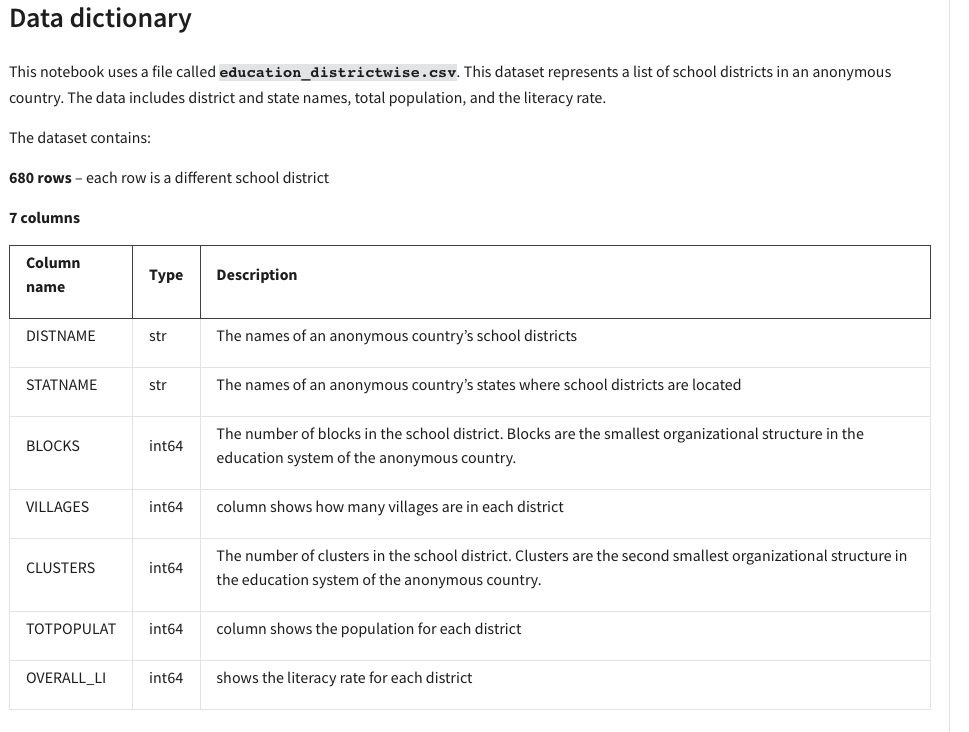

# DESCRIPTIVE STATISTICS 

In [3]:
# import packages and libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
education_data = pd.read_csv("/Users/henryasiamah/Desktop/education_districtwise.csv")
education_data.head(10)

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00
5,DISTRICT323,STATE1,12,523,96,1070144.0,64.32
6,DISTRICT114,STATE1,6,110,49,147104.0,80.48
7,DISTRICT438,STATE1,7,134,54,143388.0,74.49
8,DISTRICT610,STATE1,10,388,80,409576.0,65.97
9,DISTRICT476,STATE1,11,361,86,555357.0,69.90


In [7]:
# descriptive statistics
education_data.describe(include='all') #describe excludes missing (NAN)values. 

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
count,680,680,680.000000,680.000000,680.000000,6.340000e+02,634.000000
unique,680,36,NaN,NaN,NaN,NaN,NaN
top,DISTRICT32,STATE21,NaN,NaN,NaN,NaN,NaN
freq,1,75,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.760294,874.614706,121.226471,1.899024e+06,73.395189
std,NaN,NaN,9.585360,622.711657,94.040172,1.547475e+06,10.098460
min,NaN,NaN,1.000000,6.000000,1.000000,7.948000e+03,37.220000
25%,NaN,NaN,5.000000,390.750000,56.750000,8.226940e+05,66.437500
50%,NaN,NaN,8.000000,785.500000,101.000000,1.564392e+06,73.490000
75%,NaN,NaN,13.000000,1204.250000,162.500000,2.587520e+06,80.815000


In [9]:
# find the descriptive statistics of the literacy rate in each district

education_data['OVERALL_LI'].describe()

count    634.000000
mean      73.395189
std       10.098460
min       37.220000
25%       66.437500
50%       73.490000
75%       80.815000
max       98.760000
Name: OVERALL_LI, dtype: float64

The summary of stats gives us valuable information about the overall literacy rate. For example, the mean helps to clarify the center of your dataset. The average literacy rate is about 73% for all districts. This information is useful in itself and also as a basis for comparison. Knowing the mean literacy rate for all districts helps us understand which individual districts are significantly above or below the mean.

In [12]:
# For descriptive statistics on categorical columns

education_data['STATNAME'].describe()

count         680
unique         36
top       STATE21
freq           75
Name: STATNAME, dtype: object

The `unique` category indicates that there are 36 states in our dataset. The top category indicates that `STATE21` is the most commonly occurring value, or mode. The frequency category tells you that `STATE21` appears in 75 rows, which means it includes 75 different districts.

This information may be helpful in determining which states will need more educational resources based on their number of districts.

### Use max() and min() to compute range. 
Computing the reange for the literary rate of all disctrits in the dataset. 

In [16]:
range_over_li = education_data["OVERALL_LI"].max() - education_data["OVERALL_LI"].min()
range_over_li

61.540000000000006

The range in the literacy rates for all districts is about 61.5 points. The large difference informs that some districts have much highter literacy rates than others. 

# PROBABILITY DISTRIBUTIONS

Throughout this notebook, the normal distribution will be used to model the data. z-scores will be computed to find any outliers in the data.

In [20]:
from scipy import stats
import statsmodels.api as sm

In [21]:
education_districtwise = education_data.dropna()# dropping missing values

The first step in trying to model your data with a probability distribution is to plot a histogram. This will help you visualize the shape of your data and determine if it resembles the shape of a specific distribution.

<Axes: >

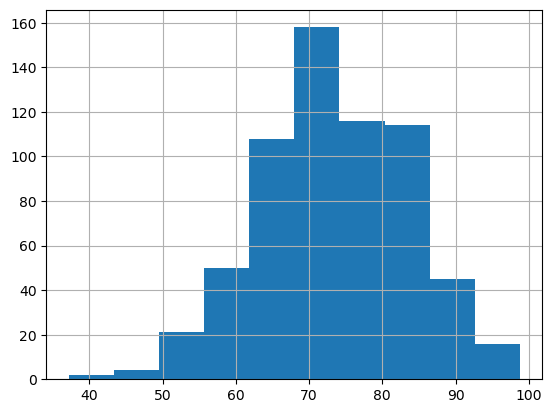

In [25]:
education_districtwise['OVERALL_LI'].hist()

### Normal distribution


The histogram shows that the distribution of the literacy rate data is bell-shaped and symmetric about the mean. The mean literacy rate, which is around 73%, is located in the centre of the plot. The **normal distribution** is a continuous probability distribution that is bell-shaped and symmetrical on both sides of the mean. The shape of the histogram suggests that the normal distribution might be a good modelling option for the data.

### Empirical rule

Since the normal distribution seems like a good fit for the district literacy rate data, we can expect the empirical rule to apply relatively well. The **empirical rule** states that for a normal distribution:

*   **68%** of the values fall within +/- 1 SD from the mean
*   **95%** of the values fall within +/- 2 SD from the mean
*   **99.7%** of the values fall within +/- 3 SD from the mean

**NOTE**: "SD" stands for standard deviation.

 In other words, we can expect that about:

*   **68%** of district literacy rates will fall within +/- 1 SD from the mean.
*   **95%** of district literacy rates will fall within +/- 2 SD from the mean.
*   **99.7%** of district literacy rates will fall within +/- 3 SD from the mean.


In [28]:
# Creating variables to store the mean and the standard deviation

mean_overall_li = education_districtwise['OVERALL_LI'].mean()
print('The mean literacy rate is about:', mean_overall_li)

The mean literacy rate is about: 73.39518927444796


In [32]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
print('The Standard deviation is about:', std_overall_li)

The Standard deviation is about: 10.098460413782469


This means the mean is about 73.4% and the standard deviation is about 10%

Now, let's compute the actual percentage of district literacy rates that fall within +/- 1 , +/- 2, +/- 3 SD from the mean. 

To do this, first, two new variables will be named: `lower_limit` and `upper_limit`. The lower limit will be one SD *below* the mean, or the mean - (1 * SD). The upper limit will be one SD *above* the mean, or the mean + (1 * SD).

In [36]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

In [38]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9542586750788643

In [40]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9968454258675079

The values agree quite well with the empirical rule!

The values of 66.4%, 95.4%, and 99.6% are very close to the values the empirical rule suggests: roughly 68%, 95%, and 99.7%.

Knowing that the data is normally distributed is useful for analysis because many statistical tests and machine learning models assume a normal distribution. Plus, when your data follows a normal distribution, you can use z-scores to measure the relative position of your values and find outliers in your data.

### Compute z-scores to find outliers

- A **z-score** is a measure of how many standard deviations below or above the population mean a data point is. A z-score is useful because it tells you where a value lies in a distribution. 

- It is also used for outlier detection. Typically, observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean.

- To find outliers in the data, first create a new column called Z_SCORE that includes the z-scores for each district literacy rate in the dataset. 

In [44]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

/var/folders/p8/733n06nx7bd3_rxwf0gydk_w0000gn/T/ipykernel_7490/3540184523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


In [46]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


- Using z-scores, two outlying districts that have unusually low literacy rates have been identified: `DISTRICT461` and `DISTRICT429`. The literacy rates in these two districts are more than 3 SDs *below* the  overall mean literacy rate. 

- The analysis gives us important information to share. The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy.

# DATA SAMPLING

The goal of your research study is to estimate the mean literacy rate for all 634 districts based on a sample of 50 districts. Only 50 randomly chosen districts can be surveyed, instead of the 634 districts included in your original dataset.

## Simulate random sampling

To do this, use`pandas.DataFrame.sample()`. The following arguments in the `sample()` function will help you simulate random sampling: 

*   `n`: Refers to the desired sample size
*   `replace`: Indicates whether you are sampling with or without replacement
*   `random_state`: Refers to the seed of the random number

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html.

**Note:**  A **random seed** is a starting point for generating random numbers. You can use any arbitrary number to fix the random seed and give the random number generator a starting point.

In [52]:
# replace = True is because sampling here is done with replacement

sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14,1.857670
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49,-2.071771
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14,-1.115425
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33,0.290849
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70,1.318549
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35,-0.499994
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94,-1.333452
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69,-0.466299
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31,1.081692
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61,-0.375124


The output shows 50 districts selected randomly from the dataset. Each has a different literacy rate, but note that row 254 was sampled twice, which is possible because sampling was done with replacement.

### Compute the sample mean

Now that the random sample has been generated, the mean function can be used to compute the sample mean.

In [56]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

74.22359999999999

The sample mean for district literacy rate is about 74.22%. This is a point estimate of the population mean based on your random sample of 50 districts which is different from the population mean for all districts. Due to sampling variability, the sample mean is usually not exactly the same as the population mean.

In [59]:
# Calculating another sample mean with a different random seed. 

estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace = True, random_state=56810).mean()
estimate2

74.2478

For the second estimate, the sample mean for district literacy rate is about 74.25%.

Due to sampling variability, this sample mean is different from the sample mean of your previous estimate, 74.22% – but they’re really close.

## The central limit theorem 

The **central limit theorem** explains that when the sample size is large enough, the sample mean approaches a normal distribution. And, as more samples are observed from the population, the sample mean gets closer to the population mean. The larger your sample size, the more accurate your estimate of the population mean is likely to be. 

In this case, the population mean is the overall literacy rate for *all* districts in the nation. Earlier, you found that the population mean literacy rate is 73.39%. Based on sampling, the first estimated sample mean was 74.22%, and the second estimate was 74.24%. Each estimate is relatively close to the population mean.

### Compute the mean of a sampling distribution with 10,000 samples

Now, imagine repeating the study 10,000 times and obtain 10,000 point estimates of the mean. In other words, take 10,000 random samples of 50 districts, and compute the mean for each sample. According to the central limit theorem, the mean of your sampling distribution will be roughly equal to the population mean. 

In [64]:
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

Note that, because any random seed was not specified for each loop iteration, by default the rows sampled will be different each time.

In [66]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

73.39721949999999

The mean of your sampling distribution is about 73.4%.

Compare this with the population mean of your complete dataset:

In [70]:
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

73.39518927444796

The mean of your sampling distribution is essentially identical to the population mean, which is also about 73.4%!

### Visualize the data

To visualize the relationship between the sampling distribution of 10,000 estimates and the normal distribution, we can plot both at the same time.

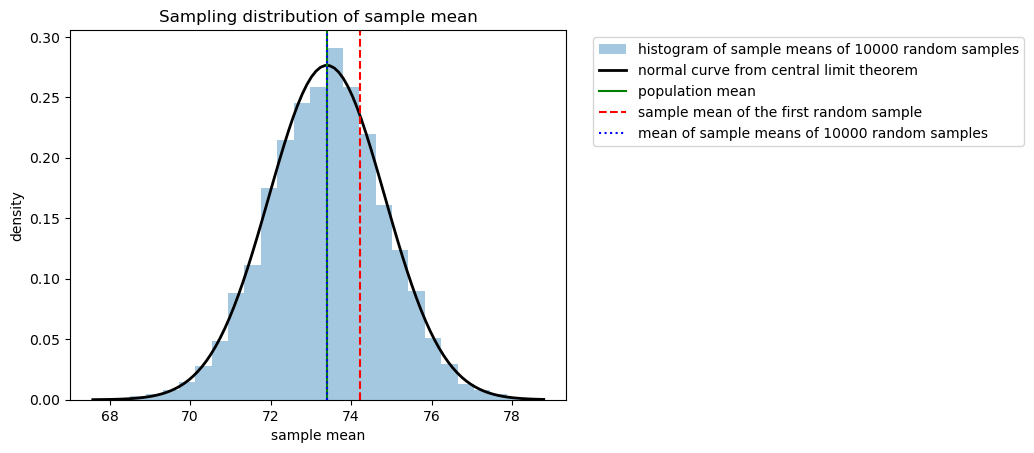

In [74]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

There are three key takeaways from this graph:

1.  As the central limit theorem predicts, the histogram of the sampling distribution is well approximated by the normal distribution. The outline of the histogram closely follows the normal curve.
2. The mean of the sampling distribution, the blue dotted line, overlaps with the population mean, the green solid line. This shows that the two means are essentially equal to each other.  
3. The sample mean of your first estimate of 50 districts, the red dashed line, is farther away from the centre. This is due to sampling variability. 

The central limit theorem shows that as the sample size increases, the estimate becomes more accurate. For a large enough sample, the sample mean closely follows a normal distribution.

The first sample of 50 districts estimated the mean district literacy rate as 74.22%, which is relatively close to the population mean of 73.4%.

To ensure the estimate will be useful to the government, you can compare the nation’s literacy rate to other benchmarks, such as the global literacy rate, or the literacy rate of peer nations. If the nation’s literacy rate is below these benchmarks, this may help convince the government to devote more resources to improving literacy across the country.

# Confidence intervals

The goal of the research study is to estimate the mean literacy rate for all 634 districts based on a sample of 50 districts. Only 50 randomly chosen districts can be surveyed, instead of the 634 districts included in your original dataset and make a point estimate of the population mean, or literacy rate for all districts. Construct a 95% confidence interval for your estimate of the mean district literacy rate. 

In [79]:
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14,1.857670
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49,-2.071771
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14,-1.115425
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33,0.290849
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70,1.318549
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35,-0.499994
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94,-1.333452
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69,-0.466299
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31,1.081692
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61,-0.375124


## Construct a 95% confidence interval 

Constructing a 95% confidence interval of the mean district literacy rate based on the sample data. The four steps for constructing a confidence interval:

1.   Identify a sample statistic
2.   Choose a confidence level
3.   Find the margin of error 
4.   Calculate the interval

Calculate the confidence interval using `scipy.stats.norm.interval()`. This function has the following arguments:
*   `confidence`: The confidence level
*   `loc`: The sample mean
*   `scale`: The sample standard error

In [82]:
sample_mean = sampled_data['OVERALL_LI'].mean()

Calculate the standard error which measures the variability between sample data. It is calculated as the **sample standard deviation
divided by the square root of the sample size**. 

In [85]:
# calculate standard error
estimated_standard_error = sampled_data['OVERALL_LI'].std() / np.sqrt(sampled_data.shape[0])

Using `scipy.stats.norm.interval()`. First, write out the function and set the arguments:

*   `confidence`: `0.95` because the confidence level is being calculated at 95%. 
*   `loc`:  `sample_mean`
*   `scale`: `estimated_standard_error`

In [88]:
stats.norm.interval(confidence = 0.95, loc=sample_mean, scale=estimated_standard_error)

(71.42241096968617, 77.02478903031381)

There is a 95% confidence interval for the mean district literacy rate that stretches from about 71.4% to 77.0%.

95% CI: (71.42, 77.02)
The Department of Education will use the estimate of the mean district literacy rate to help make decisions about distributing funds to different states.

# Construct a 99% confidence interval 
To compute a 99% confidence interval based on the same sample data, change `confidence` to `0.99`.

In [92]:
stats.norm.interval(confidence=0.99, loc=sample_mean, scale=estimated_standard_error)

(70.54221358373107, 77.90498641626891)

There is a 99% confidence interval for the mean district literacy rate that stretches from about 70.5% to 77.9%.

99% CI: (70.54, 77.90)

### Relationship between confidence level and confidence interval

It is noticed that as the confidence *level* gets higher, the confidence *interval* gets wider. 

* With a confidence level of 95%, the interval covers 5.6 percentage points (71.4% - 77.0%)
* With a confidence level of 99%, the interval covers 7.4 percentage points (70.5% - 77.9%)

This is because a wider confidence interval is more likely to include the actual population parameter.

The results will help the department of Education to decide how to distribute government resources to improve literarcy. 

# Hypothesis Testing

- Two Sample Hypothesis Test

In [3]:
import pandas as pd
from scipy import stats

In [5]:
education_districtwise = pd.read_csv("/Users/henryasiamah/Desktop/education_districtwise.csv")
education_districtwise = education_districtwise.dropna()

The Department of Education wants to collect data on mean district literacy rates for two of the nation’s largest states: STATE21 and STATE28. STATE28 has almost 40 districts, and STATE21 has more than 70. Due to limited time and resources, only survey 20 randomly chosen districts in each state. The department wants to determine if the difference between the two mean district literacy rates is statistically significant or due to chance. This will help the department decide how to distribute government funding to improve literacy. If there is a statistically-significant difference, the state with the lower literacy rate may receive more funding.

In [8]:
state21 = education_districtwise[education_districtwise['STATNAME'] == "STATE21"]

In [10]:
state28 = education_districtwise[education_districtwise['STATNAME'] == "STATE28"]

## Simulate random sampling

Sample 20 random districts from each state with replacement and a random state.

In [32]:
sampled_state21 = state21.sample(n=20, replace = True, random_state=13490)

In [34]:
sampled_state28 = state28.sample(n=20, replace = True, random_state=39103)

# Compute Sample means

In [37]:
sampled_state21['OVERALL_LI'].mean()

70.82900000000001

In [39]:
sampled_state28['OVERALL_LI'].mean()

64.60100000000001

STATE21 has a mean district literacy rate of about 70.8%, while STATE28 has a mean district literacy rate of about 64.6%.

Based on the sample data, the observed difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points (70.8% - 64.6%).

At this point, it is tempting to conclude that STATE21 has a higher overall literacy rate than STATE28. However, due to sampling variability, this observed difference might simply be due to chance, rather than an actual difference in the corresponding population means. A hypothesis test can help determine whether or not the results are statistically significant.

# Conduct a Hypothesis Test

- Using a two-sample t-test, which is the standard approach for comparing the means of two independent samples. Hypothesis testing includes:

1. State the null hypothesis and the alternative hypothesis.
2. Choose a significance level.
3. Find the p-value.
4. Reject or fail to reject the null hypothesis.

#### Step 1: State the null hypothesis and the alternative hypothesis

The **null hypothesis** is a statement that is assumed to be true unless there is convincing evidence to the contrary. The **alternative hypothesis** is a statement that contradicts the null hypothesis and is accepted as true only if there is convincing evidence for it. 

In a two-sample t-test, the null hypothesis states that there is no difference between the means of your two groups. The alternative hypothesis states the contrary claim: there is a difference between the means of your two groups. 

Use $H_0$ to denote the null hypothesis and $H_A$ to denote the alternative hypothesis.

*   $H_0$: There is no difference in the mean district literacy rates between STATE21 and STATE28.
*   $H_A$: There is a difference in the mean district literacy rates between STATE21 and STATE28.


#### Step 2: Choose a significance level

The **significance level** is the threshold at which you will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. Here the standard level of 5% is used or 0.05.

### Step 3: Find the p-value

**P-value** refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true.

Based on the sample data, the difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points. The null hypothesis claims that this difference is due to chance. The p-value is the probability of observing an absolute difference in sample means that is 6.2 or greater *if* the null hypothesis is true. If the probability of this outcome is very unlikely—in particular, if the p-value is *less than* your significance level of 5%— then the null hypothesis will be rejected.


#### `scipy.stats.ttest_ind()`

For a two-sample $t$-test, use the `scipy.stats.ttest_ind()` to compute your p-value. This function includes the following arguments:

*   `a`: Observations from the first sample 
*   `b`: Observations from the second sample
*   `equal_var`: A boolean, or true/false statement, which indicates whether the population variance of the two samples is assumed to be equal. In our example, you don’t have access to data for the entire population, so you don’t want to assume anything about the variance. To avoid making a wrong assumption, set this argument to `False`. This is because you don’t want to assume that the two samples have the same variance. equal_var is a Boolean or true-false statement, which indicates whether the population variance of the two samples is assumed to be equal.

**Reference:** [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)


In [45]:
stats.ttest_ind(a=sampled_state21['OVERALL_LI'], b=sampled_state28['OVERALL_LI'], equal_var=False)

TtestResult(statistic=2.8980444277268735, pvalue=0.006421719142765237, df=35.20796133045557)

Your p-value is about 0.0064, or 0.64%. 

This means there is only a 0.64% probability that the absolute difference between the two mean district literacy rates would be 6.2 percentage points or greater if the null hypothesis were true. In other words, it’s highly unlikely that the difference in the two means is due to chance.

#### Step 4: Reject or fail to reject the null hypothesis

To draw a conclusion, compare the p-value with the significance level.

*   If the p-value is less than the significance level, you can conclude that there is a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, reject the null hypothesis $H_0$.
*   If the p-value is greater than the significance level, you can conclude that there is *not* a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you will fail to reject the null hypothesis $H_0$.

The p-value of 0.0064, or 0.64%, is less than the significance level of 0.05, or 5%. Therefore, *reject* the null hypothesis and conclude that there is a statistically significant difference between the mean district literacy rates of the two states: STATE21 and STATE28.

This analysis will help the Department of Education decide how to distribute government resources. Since there is a statistically significant difference in mean district literacy rates, the state with the lower literacy rate, STATE28, will likely receive more resources to improve literacy.